## Data : https://www.kaggle.com/c/titanic

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
total = train_data.isnull()

In [7]:
total = train_data.isnull().sum().sort_values(ascending=False)

In [8]:
total

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [9]:
percent1 = train_data.isnull().sum()/train_data.isnull().count()*100

In [10]:
percent2 = (round(percent1,1)).sort_values(ascending=False)

In [11]:
missing_data = pd.concat([total, percent2], axis = 1, keys=['Total','%'])

In [12]:
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


In [13]:
train_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

D:\Anaconda\envs\py35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\envs\py35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\envs\py35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\envs\py35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


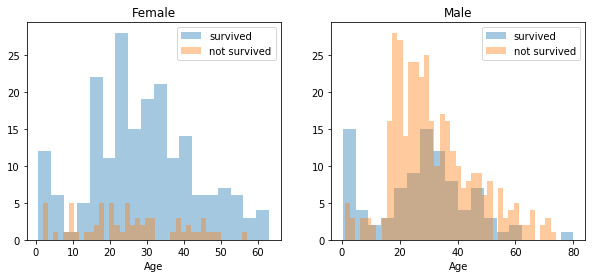

In [14]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_data[train_data['Sex']=='female']
men = train_data[train_data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde = False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde = False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

D:\Anaconda\envs\py35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\envs\py35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Anaconda\envs\py35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\envs\py35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been 

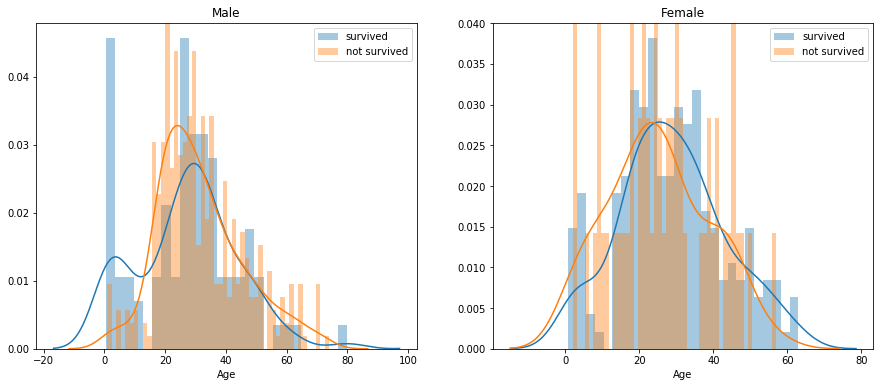

In [15]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 6))
women = train_data[train_data['Sex']=='female']
men = train_data[train_data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=26, label = survived, ax = axes[1])
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=50, label = not_survived, ax = axes[1])
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=26, label = survived, ax = axes[0])
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=50, label = not_survived, ax = axes[0])
ax.legend()
_ = ax.set_title('Male')

D:\Anaconda\envs\py35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


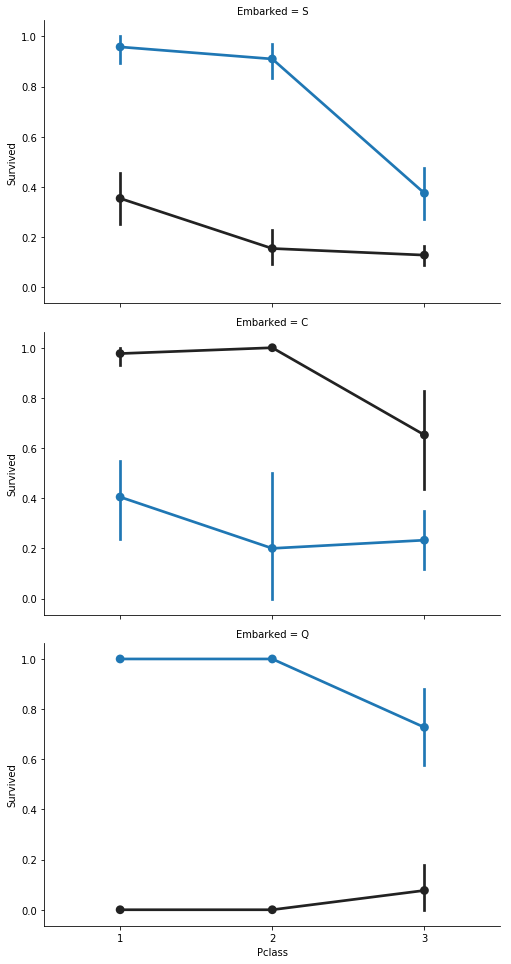

In [16]:
FacetGrid = sns.FacetGrid(train_data, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )

D:\Anaconda\envs\py35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


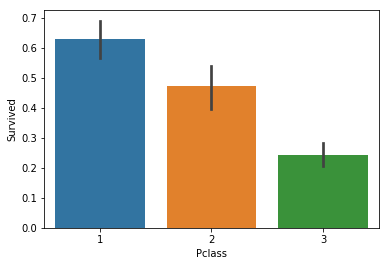

In [17]:
sns.barplot(x='Pclass', y='Survived', data = train_data)

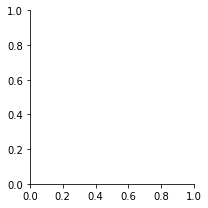

In [18]:
grid= sns.FacetGrid(data = train_data,)

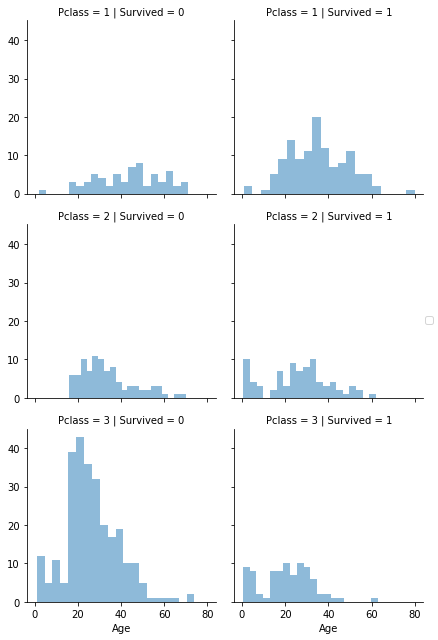

In [19]:
grid= sns.FacetGrid(data = train_data,row='Pclass', col='Survived', size=3, aspect=1, legend_out=True)
grid.map(plt.hist, 'Age', alpha = .5, bins = 20)
grid.add_legend()


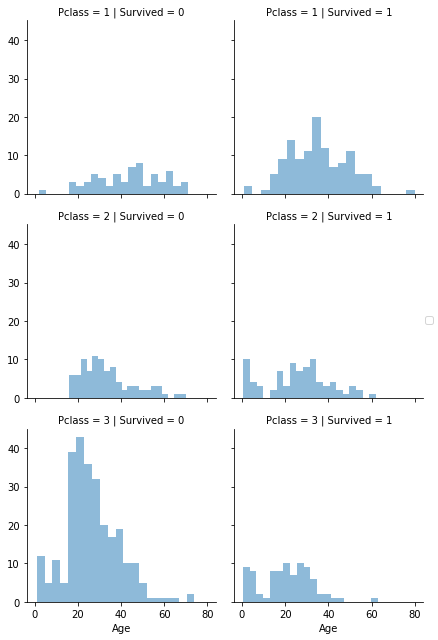

In [20]:
grid= sns.FacetGrid(data = train_data,row='Pclass', col='Survived', size=3, aspect=1, legend_out=True)
grid.map(plt.hist, 'Age', alpha = .5, bins = 20)
grid.add_legend();

# Combine Sibsp and Parch to gain a new  Feature

In [21]:
data = [train_data, test_data]

In [22]:
data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 5              6         0       3   
 6              7         0       1   
 7              8         0       3   
 8              9         1       3   
 9             10         1       2   
 10            11         1       3   
 11            12         1       1   
 12            13         0       3   
 13            14         0       3   
 14            15         0       3   
 15            16         1       2   
 16            17         0       3   
 17            18         1       2   
 18            19         0       3   
 19            20         1       3   
 20            21         0       2   
 21            22         1       2   
 22            23         1       3   
 23            24         1       1   
 24            25        

In [23]:
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

In [24]:
train_data['not_alone'].count()

891

In [25]:
train_data['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

D:\Anaconda\envs\py35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


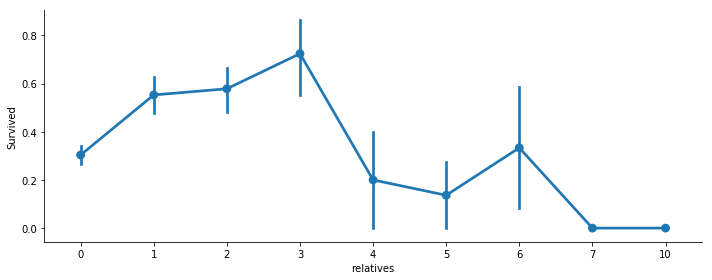

In [26]:
axes = sns.factorplot(x = 'relatives', y = 'Survived', data = train_data, aspect=2.5)

D:\Anaconda\envs\py35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


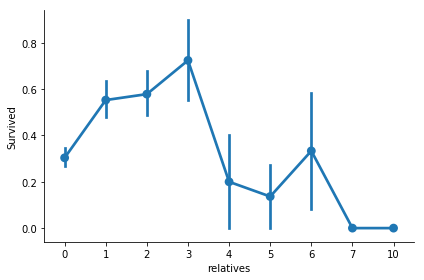

In [27]:
axes = sns.factorplot(x = 'relatives', y = 'Survived', data = train_data, aspect=1.5)

# Data Preprocessing

In [28]:
import copy

In [29]:
train_data_orig = copy.copy(train_data)

In [30]:
train_data_orig

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0


In [31]:
train_data = train_data_orig

In [32]:
train_data = train_data.drop(['PassengerId', 'Name'], axis = 1)

In [33]:
train_data = train_data_orig
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0


In [34]:
train_data = train_data.drop(['PassengerId'], axis = 1)

In [35]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,1
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0


In [36]:
import re
deck = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'U':8 }
data = [train_data, test_data]

In [37]:
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna('U0')
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile('([a-zA-Z]+)').search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

In [38]:
train_data['Deck']

0      8
1      3
2      8
3      3
4      8
5      8
6      5
7      8
8      8
9      8
10     7
11     3
12     8
13     8
14     8
15     8
16     8
17     8
18     8
19     8
20     8
21     4
22     8
23     1
24     8
25     8
26     8
27     3
28     8
29     8
      ..
861    8
862    4
863    8
864    8
865    8
866    8
867    1
868    8
869    8
870    8
871    4
872    2
873    8
874    8
875    8
876    8
877    8
878    8
879    3
880    8
881    8
882    8
883    8
884    8
885    8
886    8
887    2
888    8
889    3
890    8
Name: Deck, Length: 891, dtype: int32

In [39]:
test_data['Deck']

0      8
1      8
2      8
3      8
4      8
5      8
6      8
7      8
8      8
9      8
10     8
11     8
12     2
13     8
14     5
15     8
16     8
17     8
18     8
19     8
20     8
21     8
22     8
23     8
24     2
25     8
26     2
27     8
28     1
29     8
      ..
388    8
389    8
390    2
391    4
392    8
393    8
394    8
395    3
396    8
397    2
398    8
399    8
400    3
401    8
402    8
403    8
404    4
405    4
406    8
407    3
408    8
409    8
410    8
411    3
412    8
413    8
414    3
415    8
416    8
417    8
Name: Deck, Length: 418, dtype: int32

In [40]:
train_data['Cabin']

0               U0
1              C85
2               U0
3             C123
4               U0
5               U0
6              E46
7               U0
8               U0
9               U0
10              G6
11            C103
12              U0
13              U0
14              U0
15              U0
16              U0
17              U0
18              U0
19              U0
20              U0
21             D56
22              U0
23              A6
24              U0
25              U0
26              U0
27     C23 C25 C27
28              U0
29              U0
          ...     
861             U0
862            D17
863             U0
864             U0
865             U0
866             U0
867            A24
868             U0
869             U0
870             U0
871            D35
872    B51 B53 B55
873             U0
874             U0
875             U0
876             U0
877             U0
878             U0
879            C50
880             U0
881             U0
882         

## Dropping the data

In [41]:
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

### Calculating age by populating Random mean ages

In [42]:
data = [train_data, test_data]

for dataset in data:
    mean = train_data['Age'].mean()
    std = test_data['Age'].std()
    is_null = dataset['Age'].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_data["Age"].astype(int)

In [43]:
train_data['Age']

0      22
1      38
2      26
3      35
4      35
5      42
6      54
7       2
8      27
9      14
10      4
11     58
12     20
13     39
14     14
15     55
16      2
17     24
18     31
19     36
20     35
21     34
22     15
23     28
24      8
25     38
26     39
27     19
28     33
29     16
       ..
861    21
862    48
863    26
864    24
865    42
866    27
867    31
868    18
869     4
870    26
871    47
872    33
873    47
874    28
875    15
876    20
877    19
878    42
879    56
880    25
881    33
882    22
883    28
884    25
885    39
886    27
887    19
888    15
889    26
890    32
Name: Age, Length: 891, dtype: int32

In [44]:
train_data["Age"].isnull().sum()

0

#### We fill 2 embarked values with top values

In [45]:
train_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [46]:
common_value = 'S'
data = [train_data, test_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [47]:
train_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [48]:
train_data['Embarked'].isnull().sum()

0

In [49]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,relatives,not_alone,Deck
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.415264,0.523008,0.381594,32.204208,0.904602,0.602694,6.936027
std,0.486592,0.836071,13.561609,1.102743,0.806057,49.693429,1.613459,0.489615,2.074282
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400,0.000000,0.000000,8.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,8.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000,8.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000,8.000000


In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int32
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
relatives    891 non-null int64
not_alone    891 non-null int32
Deck         891 non-null int32
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.1+ KB


## Converting float to int

In [51]:
data = [train_data, test_data]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [52]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int32
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null int32
Embarked     891 non-null object
relatives    891 non-null int64
not_alone    891 non-null int32
Deck         891 non-null int32
dtypes: int32(4), int64(5), object(4)
memory usage: 76.6+ KB


### Extract names from data

In [53]:
data = [train_data, test_data]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

In [54]:
for dataset in data:
    # Extracting title name
    dataset['Title'] = dataset.Name.str.extract('([a-zA-Z]+)\.', expand=False)
    # replace titles with common title 
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
    

In [55]:
train_data['Title']

0      1
1      3
2      2
3      3
4      1
5      1
6      1
7      4
8      3
9      3
10     2
11     2
12     1
13     1
14     2
15     3
16     4
17     1
18     3
19     3
20     1
21     1
22     2
23     1
24     2
25     3
26     1
27     1
28     2
29     1
      ..
861    1
862    3
863    2
864    1
865    3
866    2
867    1
868    1
869    4
870    1
871    3
872    1
873    1
874    3
875    2
876    1
877    1
878    1
879    3
880    3
881    1
882    2
883    1
884    1
885    3
886    5
887    2
888    2
889    1
890    1
Name: Title, Length: 891, dtype: int64

In [56]:
train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

In [57]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,male,22,1,0,A/5 21171,7,S,1,0,8,1
1,1,1,female,38,1,0,PC 17599,71,C,1,0,3,3
2,1,3,female,26,0,0,STON/O2. 3101282,7,S,0,1,8,2
3,1,1,female,35,1,0,113803,53,S,1,0,3,3
4,0,3,male,35,0,0,373450,8,S,0,1,8,1
5,0,3,male,42,0,0,330877,8,Q,0,1,8,1
6,0,1,male,54,0,0,17463,51,S,0,1,5,1
7,0,3,male,2,3,1,349909,21,S,4,0,8,4
8,1,3,female,27,0,2,347742,11,S,2,0,8,3
9,1,2,female,14,1,0,237736,30,C,1,0,8,3


### Sex 

In [58]:
genders = {'male' : 0, 'female' : 1}
data = [train_data, test_data]

In [59]:
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [60]:
train_data['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Since 'Ticket' has these many unique values, we can drop it

In [61]:
train_data = train_data.drop(['Ticket'], axis = 1)
test_data = test_data.drop(['Ticket'], axis = 1)

#### Convert Embarked feature to Numeric

In [62]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_data, test_data]

In [63]:
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

#### Categorize Age groups to buckets

In [64]:
data = [train_data, test_data]

In [65]:
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [66]:
train_data['Age'].value_counts()

6    164
4    160
5    146
3    135
2    116
1    102
0     68
Name: Age, dtype: int64

In [67]:
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1
1,1,1,1,5,1,0,71,1,1,0,3,3
2,1,3,1,3,0,0,7,0,0,1,8,2
3,1,1,1,5,1,0,53,0,1,0,3,3
4,0,3,0,5,0,0,8,0,0,1,8,1
5,0,3,0,6,0,0,8,2,0,1,8,1
6,0,1,0,6,0,0,51,0,0,1,5,1
7,0,3,0,0,3,1,21,0,4,0,8,4
8,1,3,1,3,0,2,11,0,2,0,8,3
9,1,2,1,1,1,0,30,1,1,0,8,3


In [68]:
data = [train_data, test_data]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [69]:
train_data['Fare'].value_counts()

0    241
2    223
1    216
3    158
4     44
5      9
Name: Fare, dtype: int64

## Create New Features

In [70]:
data = [train_data, test_data]

In [71]:
for dataset in data:
    dataset['Age_Class'] = dataset['Age']* dataset['Pclass']

In [72]:
for dataset in data:
    dataset['Fare_per_person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_per_person'] = dataset['Fare_per_person'].astype(int)

In [73]:
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_per_person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,6,0,0,1,2,0,1,8,1,18,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


# Building ML Model

In [74]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


D:\Anaconda\envs\py35\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [75]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]

In [76]:
X_test  = test_data.drop("PassengerId", axis=1).copy()

In [77]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_per_person
0,3,0,2,0,0,0,2,0,1,8,1,6,0
1,3,1,5,1,0,0,0,1,0,8,3,15,0
2,2,0,3,0,0,1,2,0,1,8,1,6,1
3,3,0,5,0,0,1,0,0,1,8,1,15,1
4,3,1,5,1,1,1,0,2,0,8,3,15,0
5,3,0,6,0,0,1,0,0,1,8,1,18,1
6,3,1,6,0,0,0,2,0,1,8,2,18,0
7,2,0,0,1,1,2,0,2,0,8,1,0,0
8,3,1,3,0,0,0,1,0,1,8,3,9,0
9,3,0,1,2,0,2,0,2,0,8,1,3,0


## Stochaistic Gradient Descent

In [78]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)

In [79]:
sgd.fit(X_train, Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [80]:
Y_pred = sgd.predict(X_test)

In [81]:
sgd.score(X_train, Y_train)

0.4511784511784512

In [82]:
acc_sgd = round(sgd.score(X_train, Y_train)*100, 2)

In [83]:
acc_sgd

45.12

In [84]:
from sklearn.metrics import accuracy_score

## Random Forest

In [86]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [87]:
Y_pred = random_forest.predict(X_test)

In [88]:
random_forest.score(X_train, Y_train)

0.9292929292929293

In [90]:
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(acc_random_forest)

92.93


## Logistic Regression

In [99]:
logreg = LogisticRegression()

In [100]:
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [101]:
Y_pred = logreg.predict(X_test)

In [102]:
acc_log = round(logreg.score(X_train, Y_train)*100, 2)
print(acc_log)

81.93


## K Nearest Neighbour

In [103]:
knn = KNeighborsClassifier(n_neighbors=3)

In [104]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [105]:
Y_pred = knn.predict(X_test)

In [106]:
acc_knn = round(knn.score(X_train, Y_train)*100, 2)
print(acc_knn)

84.74


## Gaussian Naive Bayes

In [107]:
gaussian = GaussianNB()

In [109]:
gaussian.fit(X_train, Y_train)

GaussianNB(priors=None)

In [110]:
Y_pred = gaussian.predict(X_test)

In [111]:
acc_gaussian = round(gaussian.score(X_train, Y_train)*100, 2)
print(acc_gaussian)

77.78


## Perceptron 

In [116]:
perceptron = Perceptron(max_iter=5)

In [117]:
perceptron.fit(X_train, Y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=5, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [118]:
Y_pred = perceptron.predict(X_test)

In [120]:
acc_perceptron = round(perceptron.score(X_train, Y_train)*100, 2)
print(acc_perceptron)

81.71


## Linear SVM

In [121]:
linear_svc = LinearSVC()

In [122]:
linear_svc.fit(X_train, Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [123]:
linear_svc.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [124]:
acc_svc = round(linear_svc.score(X_train, Y_train)*100, 2)
print(acc_svc)

81.37


## Decision Tree

In [125]:
decision_tree = DecisionTreeClassifier()

In [126]:
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [127]:
Y_pred = decision_tree.predict(X_test)

In [128]:
acc_decision_tree = round(decision_tree.score(X_train, Y_train)*100, 2)
print(acc_decision_tree)

92.93


## Identifying the best Model

In [129]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)


,Model
Score,
92.93,Random Forest
92.93,Decision Tree
84.74,KNN
81.93,Logistic Regression
81.71,Perceptron
81.37,Support Vector Machines
77.78,Naive Bayes
45.12,Stochastic Gradient Decent


## Trying Cross Validation here to check the SD

In [134]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
score = cross_val_score(rf, X_train, Y_train, cv=10, scoring="accuracy")

In [135]:
score

array([0.78888889, 0.81111111, 0.75280899, 0.83146067, 0.87640449,
       0.85393258, 0.82022472, 0.78651685, 0.82022472, 0.86363636])

In [137]:
print('Scores :', score)

Scores: [0.78888889 0.81111111 0.75280899 0.83146067 0.87640449 0.85393258
 0.82022472 0.78651685 0.82022472 0.86363636]


In [138]:
print('Mean :',score.mean())

Mean : 0.8205209397344229


In [140]:
print('Standard Deviation :', score.std())

Standard Deviation : 0.036122597362680184


## Feature Importance analysis using Random Forest

In [142]:
importances = pd.DataFrame({'Features': X_train.columns, 'Importance': np.round(random_forest.feature_importances_, 3)})

In [143]:
importances = importances.sort_values('Importance', ascending=False).set_index('Features')

In [144]:
importances.head(10)

,Importance
Features,
Title,0.224
Sex,0.146
Age_Class,0.095
Deck,0.093
Pclass,0.075
Age,0.071
Fare,0.065
relatives,0.064
Embarked,0.052


### Data Visualisation

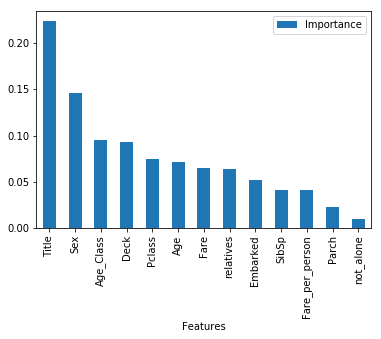

In [147]:
importances.plot.bar()

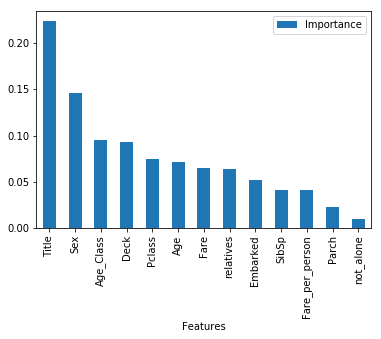

In [148]:
importances.plot.bar();

In [150]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_per_person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,6,0,0,1,2,0,1,8,1,18,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


In [153]:
train_data_a = train_data.drop(['not_alone', 'Parch'], axis=1)
test_data_a = test_data.drop(['not_alone', 'Parch'], axis=1)

In [152]:
train_data_a

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,relatives,Deck,Title,Age_Class,Fare_per_person
0,0,3,0,2,1,0,0,1,8,1,6,0
1,1,1,1,5,1,3,1,1,3,3,5,1
2,1,3,1,3,0,0,0,0,8,2,9,0
3,1,1,1,5,1,3,0,1,3,3,5,1
4,0,3,0,5,0,1,0,0,8,1,15,1
5,0,3,0,6,0,1,2,0,8,1,18,1
6,0,1,0,6,0,3,0,0,5,1,6,3
7,0,3,0,0,3,2,0,4,8,4,0,0
8,1,3,1,3,0,1,0,2,8,3,9,0
9,1,2,1,1,1,2,1,1,8,3,2,1


### Trying Random Forest Again

In [154]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score=True)

In [155]:
random_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [158]:
Y_pred = random_forest.predict(X_test) 

In [159]:
acc_random_forest = round(random_forest.score(X_train, Y_train)*100, 2)
print(acc_random_forest)

92.93


#### Use oob (Out of Bag Estimates) to evaluate on getting training size as test size

In [169]:
print("oob score:", round(random_forest.oob_score_, 4)*100)

oob score: 81.82000000000001


### Hyperparameter Tuning

In [186]:
param_grid = {'criterion':['gini','entropy'], 'min_samples_leaf':[1,5,10,25,50,70], 'min_samples_split': [2,4,10,12,16,18,25,35], 
             'n_estimators': [100,400,700,1000,1500]}

In [187]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [188]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, max_features='auto', random_state=1, n_jobs= -1)

In [189]:
clf = GridSearchCV(estimator= rf, param_grid= param_grid, n_jobs= -1)

In [192]:
# clf.fit(X_train, Y_train) -> More Time Consuming

In [194]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_leaf=1, min_samples_split=10,
                            oob_score=True, random_state=1, n_jobs = -1)

In [195]:
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [196]:
rf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [198]:
print('oob_scores :', round(rf.oob_score_, 4)*100, '%')

oob_scores : 82.49 %


### Confusion Matrix

In [199]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [200]:
predictions = cross_val_predict(rf, X_train, Y_train, cv=3)

In [201]:
cm = confusion_matrix(Y_train, predictions)

In [203]:
cm

array([[490,  59],
       [ 93, 249]], dtype=int64)

### Precision and Recall

In [204]:
from sklearn.metrics import precision_score, recall_score

In [205]:
print('Precsion Score :', precision_score(Y_train, predictions))
print('Recall Score :', recall_score(Y_train, predictions))

Precsion Score : 0.8084415584415584
Recall Score : 0.7280701754385965


In [208]:
#F-score is computed with the harmonic mean of Precision and Recall

from sklearn.metrics import f1_score
f1 = f1_score(Y_train,predictions)
print(f1)

#  F-score is not perfect, because it favors classifiers that have a similar precision and recall

0.7661538461538462


In [210]:
from sklearn.metrics import precision_recall_curve
y_scores = rf.predict_proba(X_train)
y_scores = y_scores[:, 1]

In [211]:
y_scores

array([0.25667361, 0.9925    , 0.59866548, 0.9975    , 0.001     ,
       0.06170174, 0.12587141, 0.12782934, 0.66033258, 0.90388795,
       0.64598781, 0.86949019, 0.08902555, 0.0467938 , 0.63342583,
       0.92378666, 0.06072462, 0.10355061, 0.66048865, 0.7906347 ,
       0.05639905, 0.5885388 , 0.58406765, 0.25472582, 0.06583072,
       0.29195174, 0.10112401, 0.27701014, 0.68546271, 0.08357273,
       0.3421906 , 0.98033107, 0.78390169, 0.23537855, 0.17790999,
       0.13263409, 0.10112401, 0.08902555, 0.41450905, 0.44460413,
       0.27738291, 0.75703426, 0.10112401, 0.93542617, 0.81261625,
       0.08902555, 0.1350998 , 0.68546271, 0.24365756, 0.48660175,
       0.05982056, 0.0360682 , 0.99746032, 0.90476911, 0.3174795 ,
       0.49156037, 0.81641619, 0.19419561, 0.93490648, 0.0791326 ,
       0.22341319, 1.        , 0.39878327, 0.1177661 , 0.30002714,
       0.7138804 , 0.96035193, 0.08902555, 0.43035091, 0.04132153,
       0.07554026, 0.08562517, 0.27773472, 0.09785212, 0.52340

In [212]:
precision, recall, threshold = precision_recall_curve(Y_train, y_scores)

In [215]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], 'r-', label='precision', linewidth = 5)
    plt.plot(threshold, recall[:-1], 'b', label='recall', linewidth = 5)
    plt.xlabel('threshold', fontsize = 18)
    plt.legend(loc = 'upper right', fontsize = 18)
    plt.ylim([0,1])

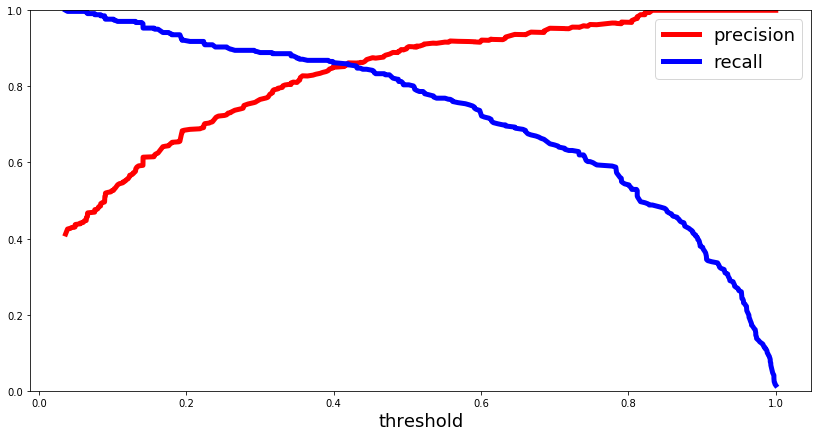

In [216]:
plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

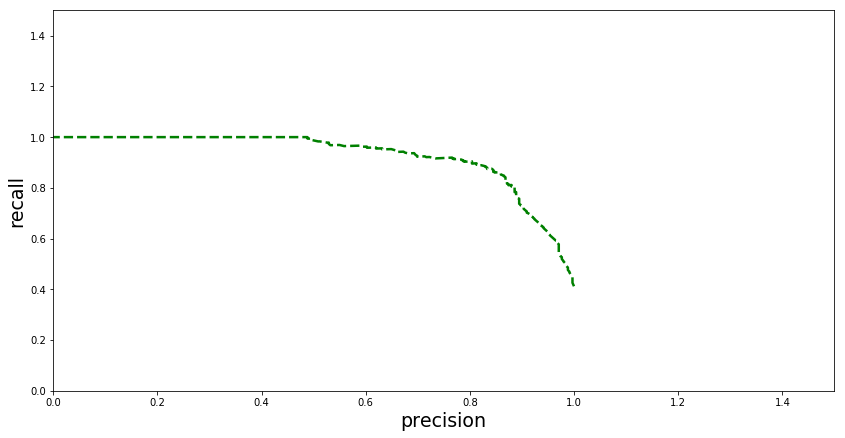

In [217]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

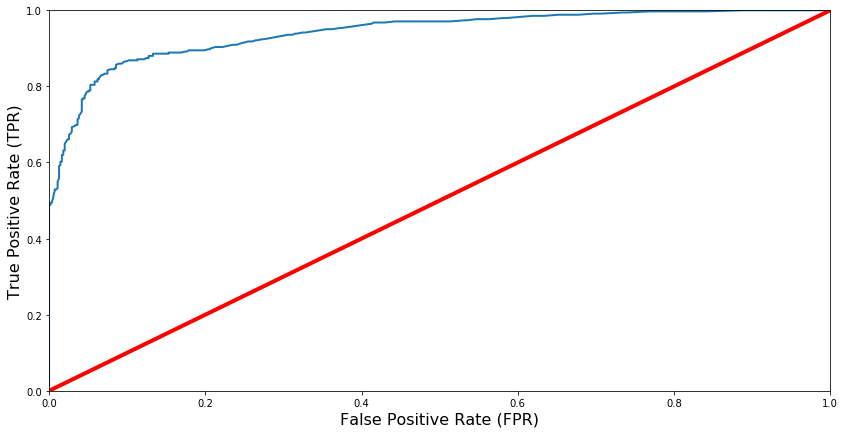

In [218]:
# ROC-AUC Curve

from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [221]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(Y_train, y_scores)
print('The ROC AUC score is:', roc_auc)

The ROC AUC score is: 0.941358024691358
